In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn import metrics
import re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer


In [136]:
df = pd.read_csv("train.csv")

In [137]:
df.shape

(3097, 4)

In [138]:
df.head()

,benefits_review,side_effects_review,comments_review,rating
0,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",4
1,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",1
2,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,10
3,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,3
4,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,2


In [139]:
df.isna().sum()

benefits_review        0
side_effects_review    0
comments_review        0
rating                 0
dtype: int64

In [140]:
df.rating.value_counts()

10    741
8     555
9     479
7     350
1     304
5     159
6     156
3     145
4     105
2     103
Name: rating, dtype: int64

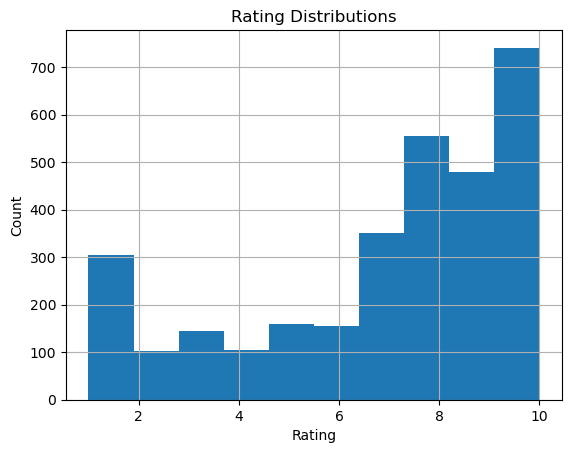

In [141]:
df['rating'].hist()
plt.title("Rating Distributions")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [142]:
df.rating = np.where(df.rating > 7, 1, 0) 

In [143]:
df['review'] = df['benefits_review'] + ' ' + df['side_effects_review'] + ' ' + df['comments_review']

In [144]:
# Convert text columns to lowercase
df['review'] = df['review'].apply(lambda x: x.lower())

In [145]:
# remove numbers from text
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

df['review'] = df['review'].apply(remove_numbers)

In [146]:
X = df.loc[:, ('review')]
y = df.rating

In [147]:
X.head()


0    slowed the progression of left ventricular dys...
1    although this type of birth control has more c...
2    i was used to having cramps so badly that they...
3    the acid reflux went away for a few months aft...
4    i think that the lyrica was starting to help w...
Name: review, dtype: object

In [148]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: rating, dtype: int64

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [150]:
y_train.value_counts()

1    1242
0     925
Name: rating, dtype: int64

In [151]:
X_train_docs = [doc for doc in X_train]

remove stop words

In [152]:
en_nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [153]:
pattern = re.compile('(?u)\\b\\w\\w+\\b')

In [154]:
def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    lemmas = [token.lemma_ for token in doc_spacy]
    return [token for token in lemmas if token not in STOP_WORDS and pattern.match(token)]

In [155]:
vect = TfidfVectorizer(tokenizer=custom_tokenizer, ngram_range=(1, 2), max_features=1000).fit(X_train_docs)

/Users/mang/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [156]:
X_train_tr = vect.transform(X_train_docs)

In [157]:
feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 100 features:\n{}".format(feature_names[:100]))
print("Every 100th feature:\n{}".format(feature_names[::100]))

Number of features: 1000
First 100 features:
['abdominal', 'ability', 'able', 'able function', 'able sleep', 'absolutely', 'accompany', 'accutane', 'ache', 'acid', 'acid reflux', 'acne', 'act', 'active', 'activity', 'actually', 'add', 'adderall', 'addictive', 'addition', 'adjust', 'administer', 'adult', 'adverse', 'adverse effect', 'advise', 'affect', 'afraid', 'afternoon', 'age', 'ago', 'aid', 'alcohol', 'allergic', 'allergic reaction', 'allergy', 'alleviate', 'allow', 'alot', 'alternative', 'ambien', 'and/or', 'anger', 'ankle', 'anti', 'anti depressant', 'antibiotic', 'antidepressant', 'anxiety', 'anxious', 'anymore', 'appear', 'appetite', 'application', 'apply', 'approximately', 'area', 'arm', 'arthritis', 'ask', 'asleep', 'associate', 'asthma', 'attack', 'attempt', 'attention', 'available', 'avoid', 'awake', 'aware', 'away', 'awful', 'bad', 'bad effect', 'base', 'basically', 'basis', 'beat', 'bed', 'bedtime', 'begin', 'beginning', 'believe', 'beneficial', 'benefit', 'big', 'bipolar

/Users/mang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [158]:
vect.get_feature_names()[-50:]

['vision',
 'visit',
 'vitamin',
 'vivid',
 'vomiting',
 'vyvanse',
 'wait',
 'wake',
 'walk',
 'want',
 'wash',
 'wash face',
 'water',
 'way',
 'wean',
 'wear',
 'week',
 'week start',
 'week use',
 'weekly',
 'weight',
 'weight gain',
 'weight loss',
 'wellbutrin',
 'whatsoever',
 'white',
 'wish',
 'withdrawal',
 'woman',
 'wonder',
 'word',
 'work',
 'work great',
 'worry',
 'worsen',
 'worth',
 'wrinkle',
 'xanax',
 'xr',
 'year',
 'year ago',
 'year later',
 'year old',
 'yeast',
 'yeast infection',
 'young',
 'yr',
 'zoloft',
 'zombie',
 'zyrtec']

In [159]:
X_train_tr.toarray()[:5, :20]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.15052131, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0

train model using LinearSVC classifier

In [160]:
lin_svc = LinearSVC(max_iter=120000)

In [161]:
scores = cross_val_score(lin_svc, X_train_tr, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.65


In [162]:
lin_svc.fit(X_train_tr, y_train)

LinearSVC(max_iter=120000)

validate model using test set

In [163]:
X_test_docs = [doc for doc in X_test]
X_test_features = vect.transform(X_test_docs)

In [164]:
y_test_pred = lin_svc.predict(X_test_features)

In [165]:
metrics.accuracy_score(y_test, y_test_pred)

0.6655913978494624

In [167]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline

train = pd.read_csv('train.csv')
train.rating = np.where(train.rating > 7, 1, 0) 
train_X = train.loc[:, ('benefits_review', 'side_effects_review', 'comments_review')]
train_y = train.rating
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.3, stratify=train_y)
X_train_docs = [doc for doc in X_train.side_effects_review]
pipeline = Pipeline([
            ('vect', TfidfVectorizer(ngram_range=(1,2), 
                                    stop_words='english')),
            ('cls', LinearSVC())
])
pipeline.fit(X_train_docs, y_train)
training_accuracy = cross_val_score(pipeline, X_train_docs, y_train, cv=5).mean()
print("Training accuracy:", training_accuracy)
predicted = pipeline.predict([doc for doc in X_test.side_effects_review])
validation_accuracy = metrics.accuracy_score(y_test, predicted)
f1_score = f1_score(y_test, predicted)
print("Validation accuracy:", validation_accuracy)
print("F1 score:", f1_score)

Training accuracy: 0.6880461042347357
Validation accuracy: 0.6688172043010753
F1 score: 0.7121495327102803
